In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y) # 학습을 하게됨

clf.predict([[2., 2.]])

array([1])

In [3]:
clf.predict_proba([[2., 2.]])   # 비율 출력

array([[0., 1.]])

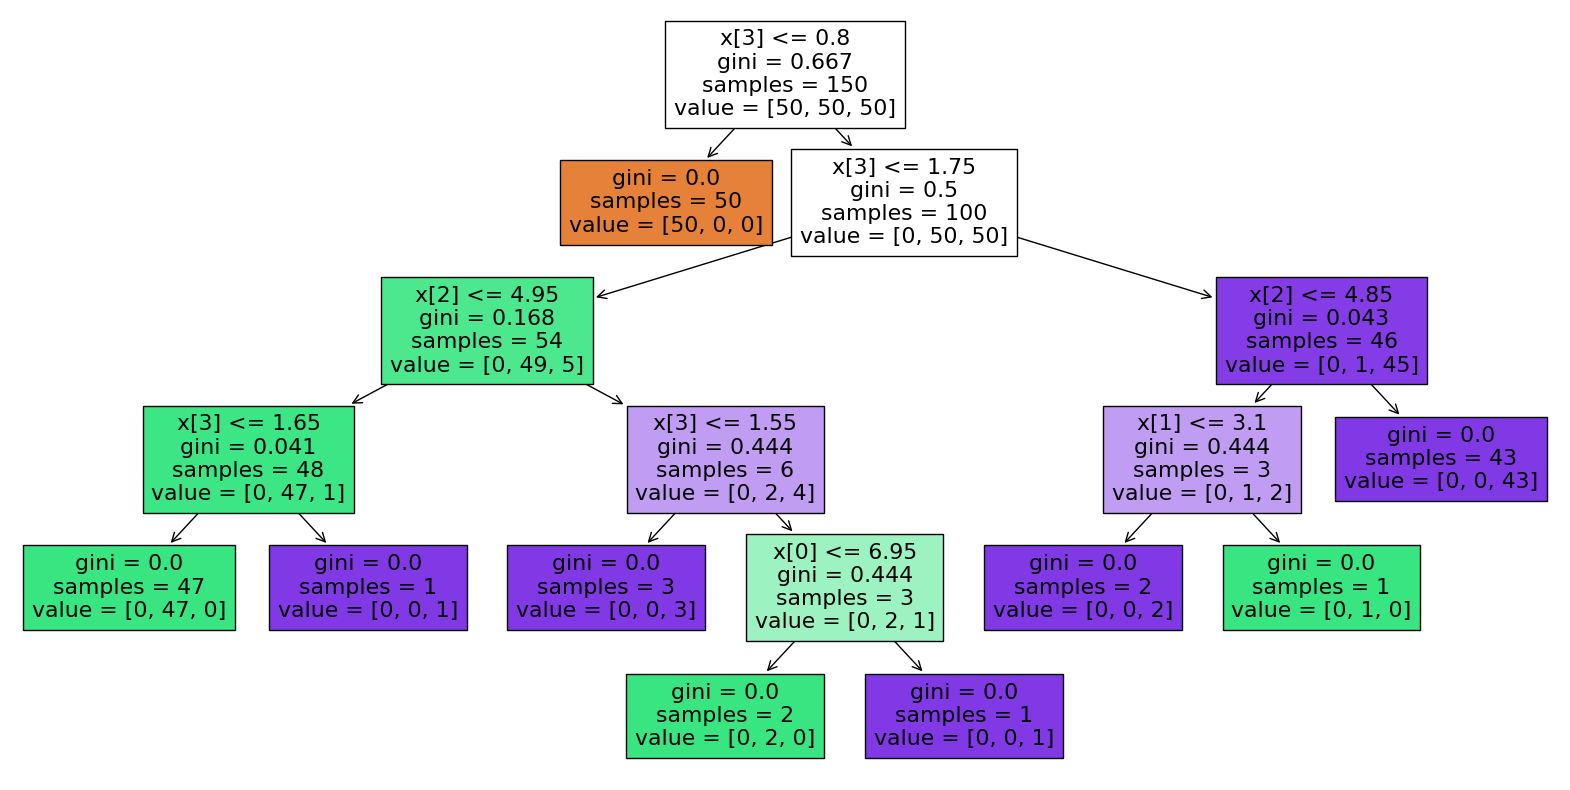

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
t = tree.plot_tree(clf.fit(X, y), filled=True)

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [142]:
df.head()   # 모두 숫자로 돼있어서 전처리가 필요없음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [143]:
# 수치형 변수를 범주형 변수로 바꾸기
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [144]:
# One-Hot-Encoding
# 이 경우엔 정확도를 감소시킴
df['Age_low'] = df['Age'] < 30
df['Age_middle'] = (df['Age'] >= 30) & (df['Age'] <= 60)
df['Age_high'] = df['Age'] > 60
df[['Age', 'Age_low', 'Age_middle', 'Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_high', ylabel='count'>

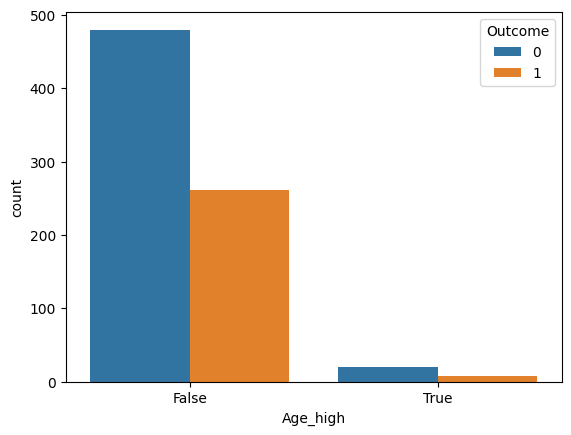

In [145]:
sns.countplot(data=df, x='Age_high', hue='Outcome')

In [146]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [147]:
df.describe()   # 최소값이 0인 데이터가 많이 보임

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [175]:
df['Insulin_nan']=df['Insulin'].replace(0, np.nan)
df[['Insulin', 'Insulin_nan']].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [176]:
df['Insulin_nan'].isnull().sum()

374

In [177]:
# 결측치 비율
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [178]:
df.groupby(['Outcome'])[['Insulin', 'Insulin_nan']].mean()  # 결측치 값을 채워줘야함

,Insulin,Insulin_nan
Outcome,,
0,68.792000,130.287879
1,100.335821,206.846154


In [179]:
df.groupby(['Outcome'])[['Insulin', 'Insulin_nan']].agg(['mean', 'median'])

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [180]:
# 결측치 채우기
df.loc[(df['Outcome'] == 0) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 102.5
df.loc[(df['Outcome'] == 1) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 196.5
df.loc[(df['Outcome'] == 1) & (df['Insulin_nan'].isnull()), 'Insulin_nan']

Series([], Name: Insulin_nan, dtype: float64)

/var/folders/jk/f8yz8m0x7sl5ls0qq4fz6fkm0000gn/T/ipykernel_65297/425532828.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin']))


<Axes: xlabel='Insulin', ylabel='Density'>

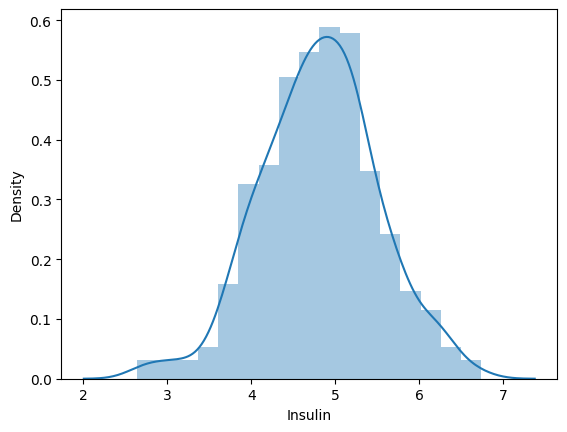

In [204]:
sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin'] + 1))  # 로그를 취할때 +1을 해주는 이유는 0 이하일때 -로 수렴하기 때문

/var/folders/jk/f8yz8m0x7sl5ls0qq4fz6fkm0000gn/T/ipykernel_65297/2248232018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_nan'])


<Axes: xlabel='Insulin_nan', ylabel='Density'>

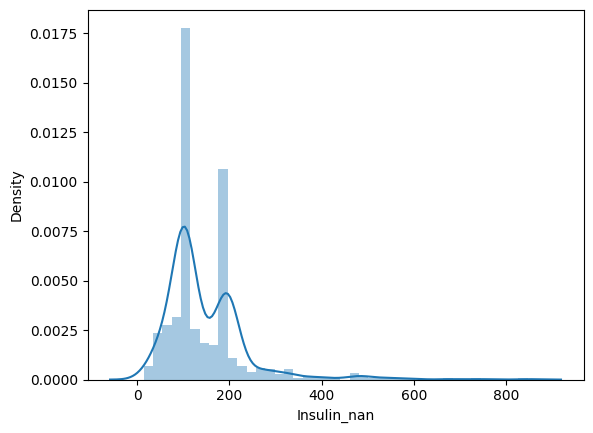

In [205]:
sns.distplot(df['Insulin_nan'])

/var/folders/jk/f8yz8m0x7sl5ls0qq4fz6fkm0000gn/T/ipykernel_65297/3858937078.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Insulin_log'])


<Axes: xlabel='Insulin_log', ylabel='Density'>

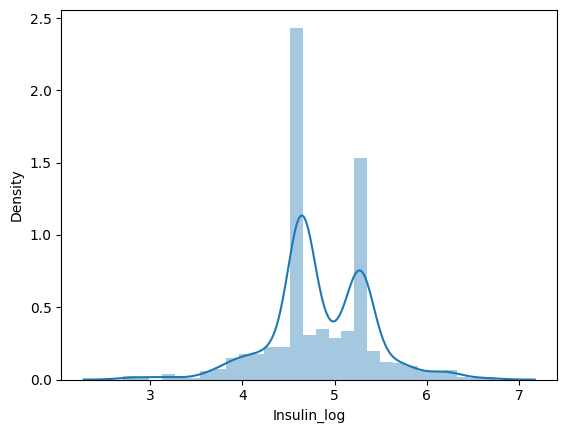

In [206]:
df['Insulin_log'] = np.log(df['Insulin_nan'] + 1)
sns.distplot(df['Insulin_log'])

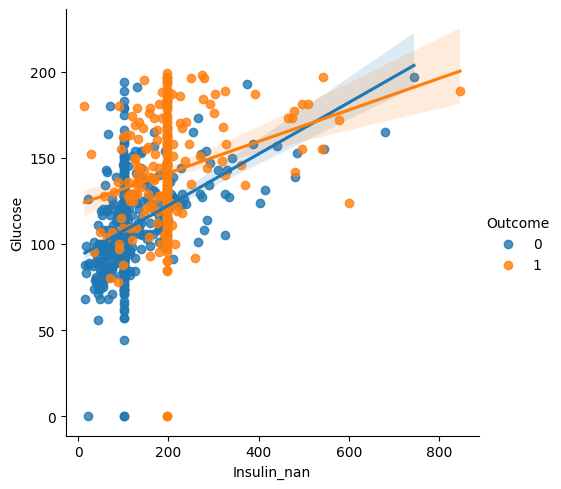

In [228]:
sns.lmplot(data=df, x='Insulin_nan', y='Glucose', hue='Outcome')

In [233]:
df['low_glu_insulin'] = (df['Glucose'] < 100) & (df['Insulin_nan'] <= 102.5)
df['low_glu_insulin'].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [235]:
pd.crosstab(df['Outcome'], df['low_glu_insulin'])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


In [236]:
split_count = int(df.shape[0] * 0.8)  # 행의 값에 0.8을 곱해줌 (전체 데이터를 8:2로 나누기 위해)
split_count

614

In [237]:
train = df[:split_count].copy()    # 0~613번까지 가져옴, 전처리를 위해 copy로 가져오는 것이 좋음
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,196.5,5.285739,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,196.5,5.285739,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0,False,True,False,False,182.0,5.209486,False
610,3,106,54,21,158,30.9,0.292,24,0,False,True,False,False,158.0,5.068904,False
611,3,174,58,22,194,32.9,0.593,36,1,False,False,True,False,194.0,5.273000,False
612,7,168,88,42,321,38.2,0.787,40,1,True,False,True,False,321.0,5.774552,False


In [238]:
test = df[split_count:].copy()
test.shape

(154, 16)

In [239]:
feature_names = train.columns.tolist()  # 마지막 컬럼인 outcome만 제외하고 가져옴
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_nan')

feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_log',
 'low_glu_insulin']

In [240]:
label_name = 'Outcome'  # outcome을 저장해줌
label_name

'Outcome'

In [241]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log,low_glu_insulin
0,148,72,35,33.6,0.627,50,False,5.285739,False
1,85,66,29,26.6,0.351,31,False,4.639572,True
2,183,64,0,23.3,0.672,32,True,5.285739,False
3,89,66,23,28.1,0.167,21,False,4.553877,True
4,137,40,35,43.1,2.288,33,False,5.129899,False


In [242]:
train[label_name]   # 당뇨병이면 1, 아니면 0인 값들

0      1
1      0
2      1
3      0
4      1
      ..
609    0
610    0
611    1
612    1
613    0
Name: Outcome, Length: 614, dtype: int64

In [243]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [244]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log,low_glu_insulin
614,138,74,26,36.1,0.557,50,True,4.976734,False
615,106,72,0,25.8,0.207,27,False,4.639572,False
616,117,96,0,28.7,0.157,30,False,4.639572,False
617,68,62,13,20.1,0.257,23,False,2.772589,True
618,112,82,24,28.2,1.282,50,True,5.285739,False


In [216]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [245]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)   # 예측한 결과
y_predict[:5]

array([1, 0, 0, 0, 1])

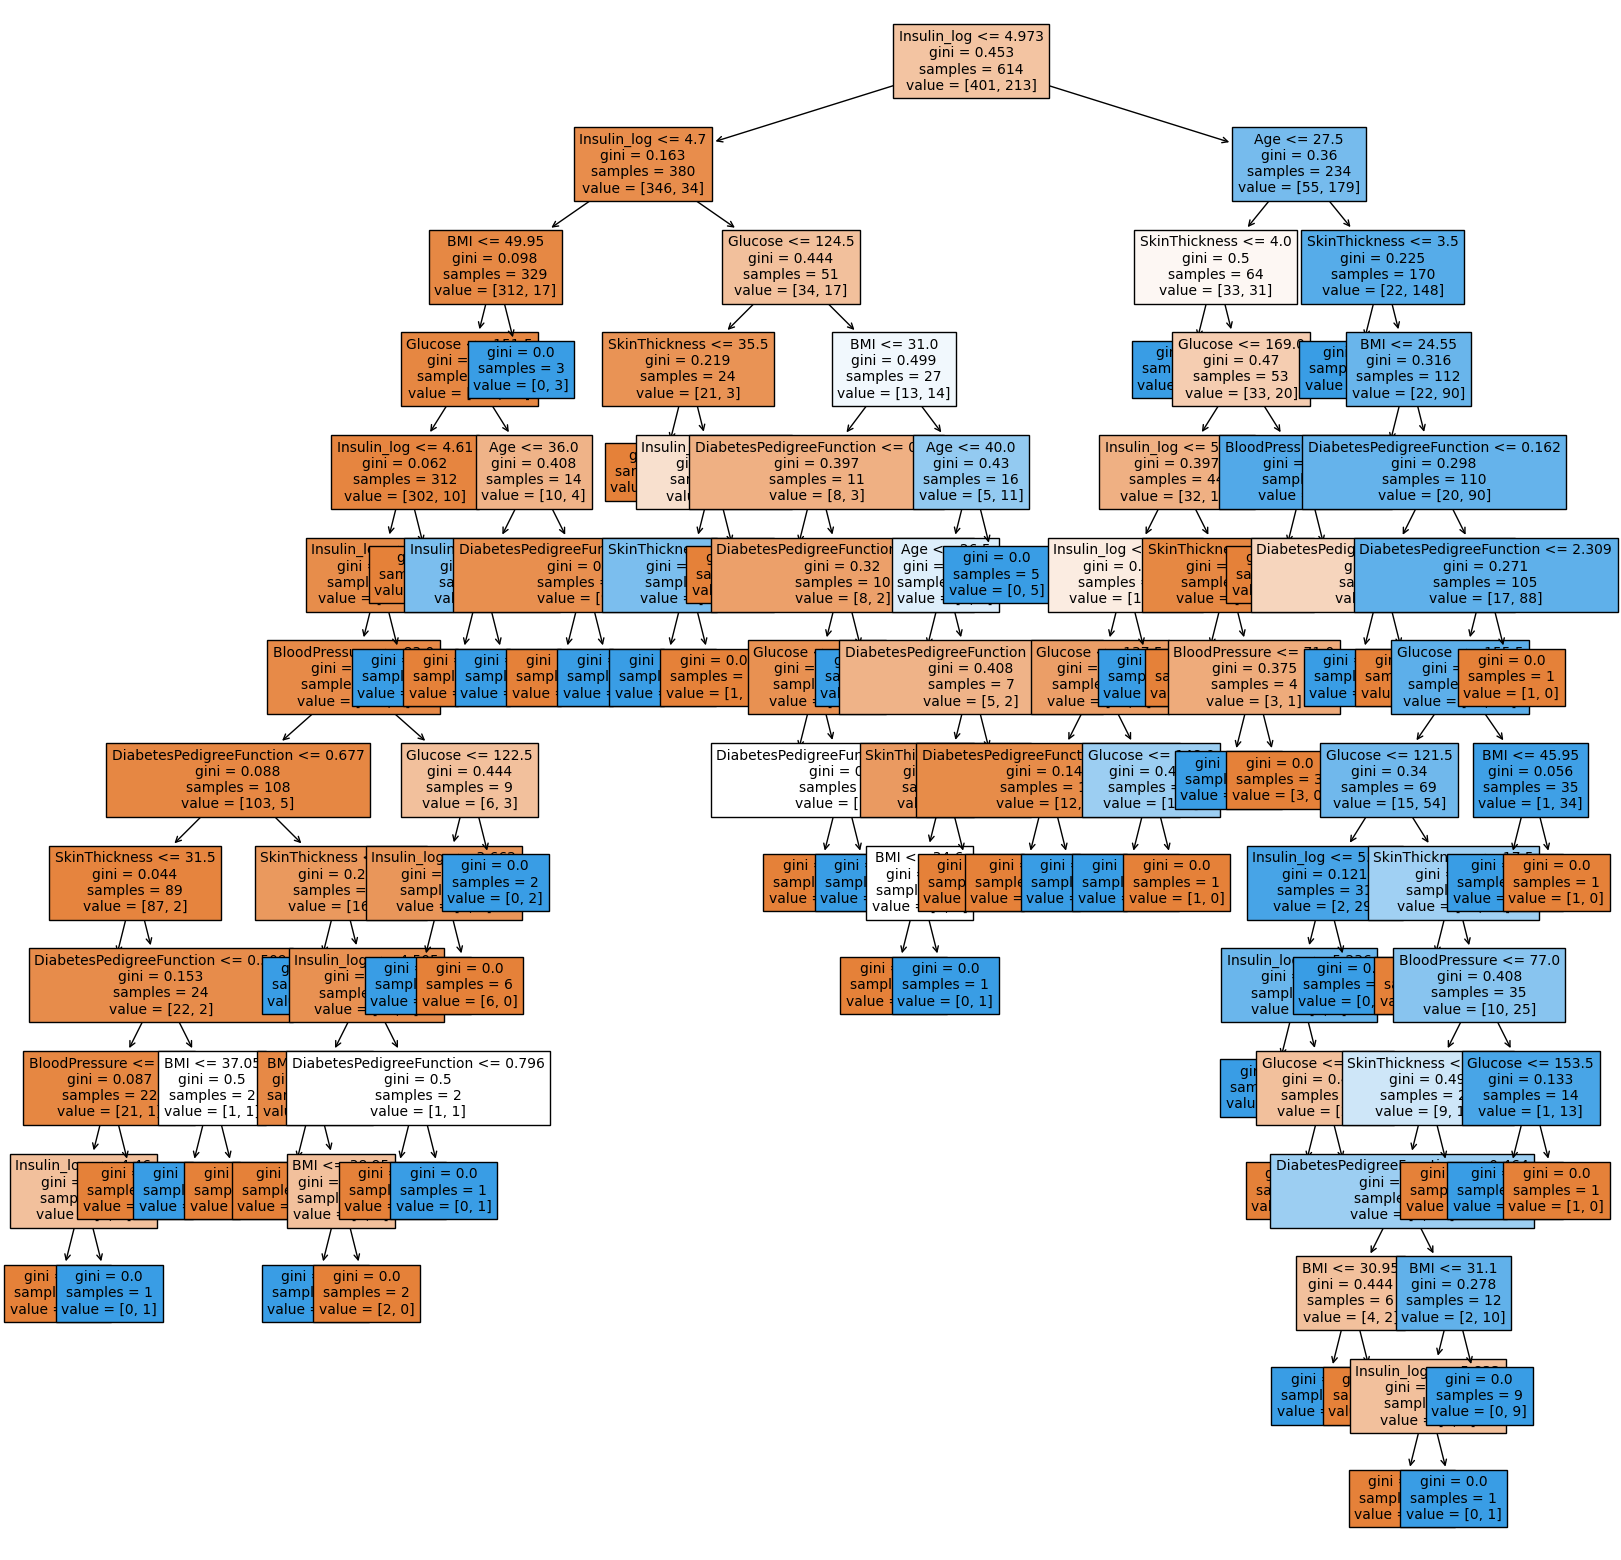

In [246]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)   # text로 tree를 나타내줌

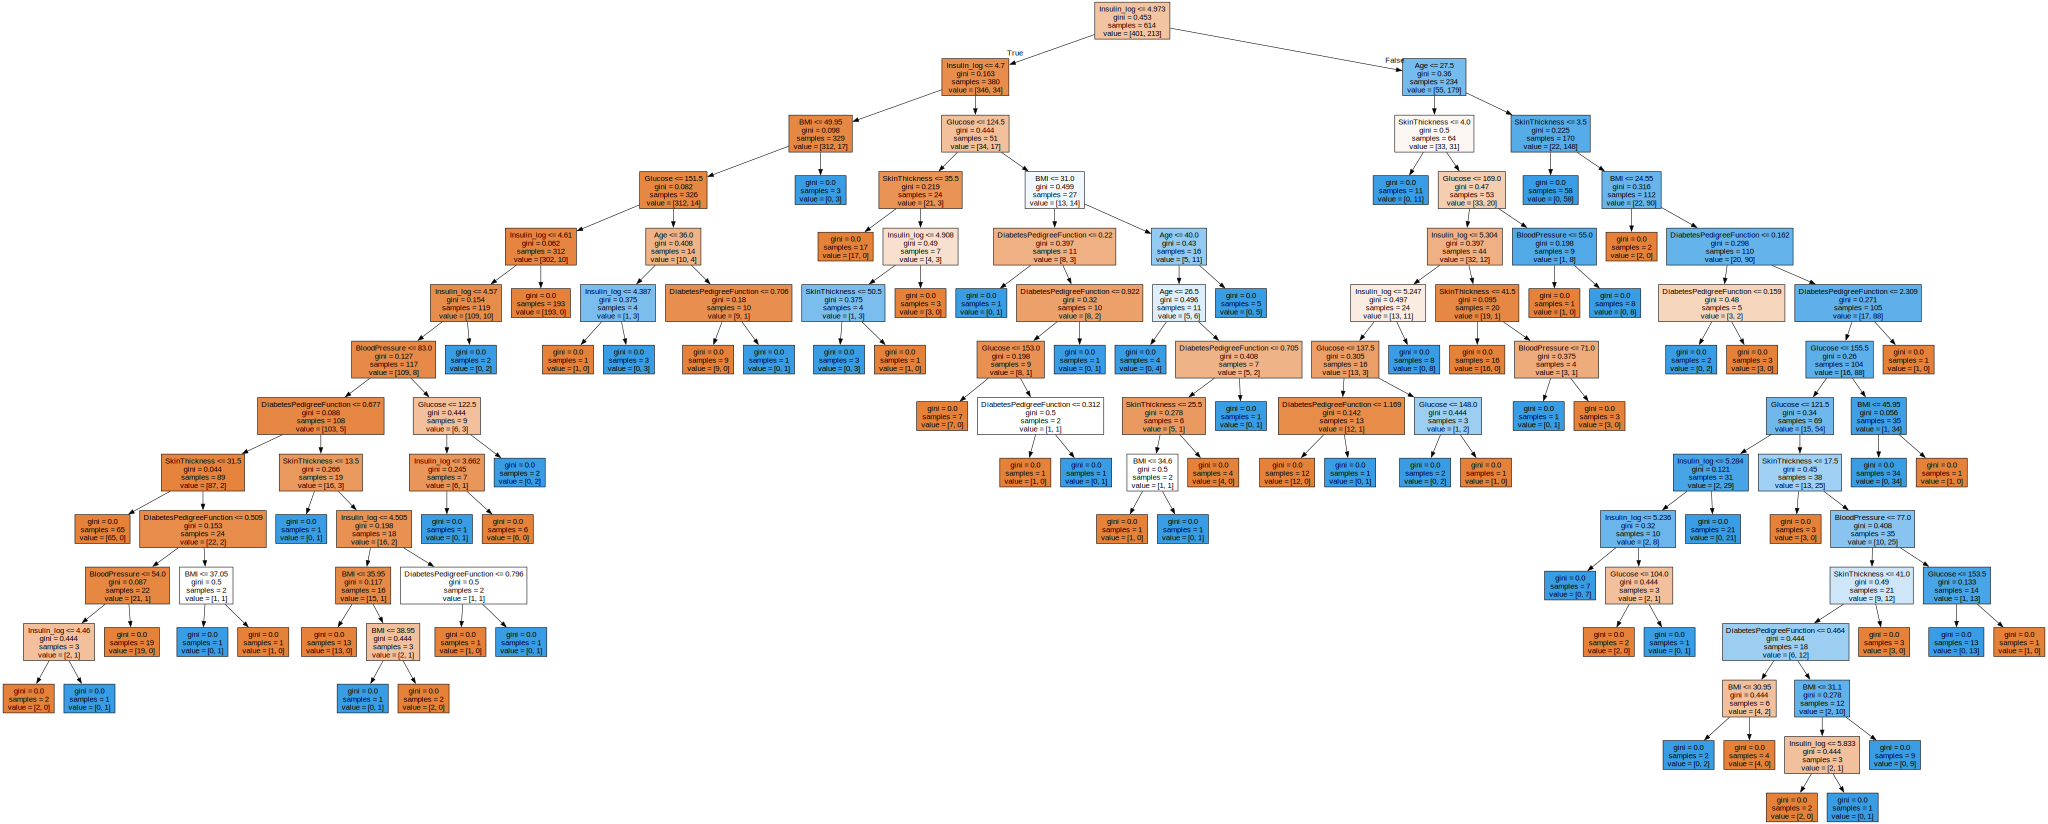

In [247]:
import graphviz
from sklearn.tree import export_graphviz

# gini계수가 0이면 트리 생성을 멈춤

dot_tree = export_graphviz(model, feature_names=feature_names, filled=True)

graphviz.Source(dot_tree)

In [248]:
# feature의 중요도 추출
model.feature_importances_

array([0.08950704, 0.02647324, 0.07636347, 0.07477171, 0.06615205,
       0.0729744 , 0.        , 0.59375809, 0.        ])

<Axes: >

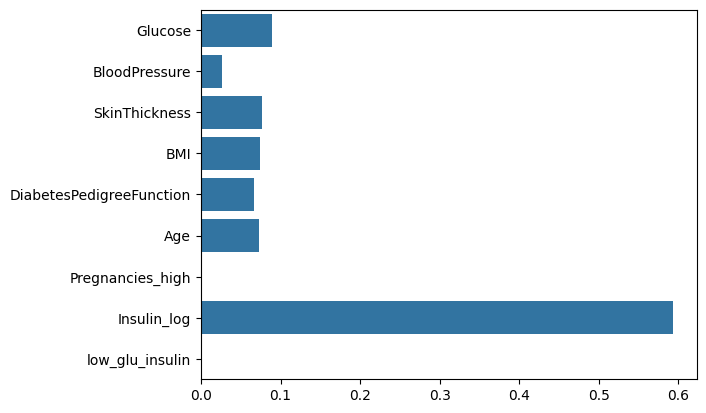

In [249]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [250]:
diff_count = abs(y_test - y_predict).sum()
diff_count

25

In [251]:
# 실제값 - 예측값을 했을 때 0이 나오면 예측이 성공한 것
# 절대값을 씌웠을 때 값이 1이면 다르게 예측을 한 것

abs(y_test - y_predict).sum()   # 예측을 다르게 한 수를 구함

25

In [252]:
abs(y_test - y_predict).sum() / len(y_test) # 28%를 잘못 예측함

0.16233766233766234

In [253]:
# 예측의 정확도를 직접 구함
# 정확도 수치 향상
diff_count = abs(y_test - y_predict).sum()
(len(y_test) - diff_count) / len(y_test) * 100

83.76623376623377

In [254]:
# 미리 구현된 알고리즘을 가져옴
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

83.76623376623377

In [255]:
# y_test를 알고 있을 때 score를 사용
model.score(X_test, y_test) * 100

83.76623376623377